## Importing libraries

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [5]:
import warnings as warn
warn.filterwarnings('ignore')

## Loading data

In [17]:
bike = pd.read_csv('bike.csv')

In [18]:
bike.head()

,datetime,Unnamed: 1,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,NaN,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,NaN,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,NaN,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,NaN,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,NaN,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
bike=bike.drop('Unnamed: 1',axis=1)

In [20]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## prepare the data by creating a month and year column and total riders columns

In [33]:
bike['datetime'] = pd.to_datetime(bike['datetime'])

In [34]:
bike['month'] = bike['datetime'].dt.strftime('%B')

In [35]:
bike.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,January
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,January


In [62]:
bike['year'] = bike['datetime'].dt.year

In [38]:
bike['month_num'] = bike['datetime'].dt.month

In [39]:
bike['day_num'] = bike['datetime'].dt.dayofweek

In [40]:
bike['day_of_week'] = bike['datetime'].dt.strftime('%A')

In [41]:
bike['total_riders'] = bike.casual + bike.registered

In [42]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,month_num,day_num,day_of_week,total_riders
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,January,1,5,Saturday,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,January,1,5,Saturday,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,January,1,5,Saturday,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,January,1,5,Saturday,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,January,1,5,Saturday,1


In [43]:
bike.season = bike.season.map({1:'winter', 2:'spring',3:'summer',4:'fall'})

In [67]:
bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,month_num,day_num,day_of_week,total_riders,year
0,2011-01-01 00:00:00,winter,0,0,1,9.84,14.395,81,0.0,3,13,16,January,1,5,Saturday,16,2011
1,2011-01-01 01:00:00,winter,0,0,1,9.02,13.635,80,0.0,8,32,40,January,1,5,Saturday,40,2011
2,2011-01-01 02:00:00,winter,0,0,1,9.02,13.635,80,0.0,5,27,32,January,1,5,Saturday,32,2011
3,2011-01-01 03:00:00,winter,0,0,1,9.84,14.395,75,0.0,3,10,13,January,1,5,Saturday,13,2011
4,2011-01-01 04:00:00,winter,0,0,1,9.84,14.395,75,0.0,0,1,1,January,1,5,Saturday,1,2011


## what percent of the riders are registered

In [46]:
bike.registered.sum()*100/bike.total_riders.sum()

81.1968586548107

## does the registered rider percentage increase by month over time?

In [48]:
bike.groupby(['season','month'])['registered'].sum()

season  month    
fall    December     145460
        November     151087
        October      169347
spring  April        127589
        June         172159
        May          158862
summer  August       167646
        July         163670
        September    166628
winter  February      89816
        January       72632
        March        108445
Name: registered, dtype: int64

In [49]:
bike.groupby('month')['total_riders'].sum()

month
April        167402
August       213516
December     160160
February      99113
January       79884
July         214617
June         220733
March        133501
May          200147
November     176440
October      207434
September    212529
Name: total_riders, dtype: int64

In [51]:
bike.groupby(['season','month'])['registered'].sum()*100/bike.groupby('month')['total_riders'].sum()

season  month    
fall    December     90.821678
        November     85.630809
        October      81.638979
spring  April        76.217130
        June         77.994228
        May          79.372661
summer  August       78.516832
        July         76.261433
        September    78.402477
winter  February     90.619798
        January      90.921837
        March        81.231601
dtype: float64

## what is the percent of riders by month

In [54]:
bike.groupby('month')['total_riders'].sum()

month
April        167402
August       213516
December     160160
February      99113
January       79884
July         214617
June         220733
March        133501
May          200147
November     176440
October      207434
September    212529
Name: total_riders, dtype: int64

In [55]:
bike['total_riders'].sum()

2085476

In [56]:
bike.groupby('month')['total_riders'].sum()*100/bike['total_riders'].sum()

month
April         8.027040
August       10.238238
December      7.679781
February      4.752536
January       3.830492
July         10.291032
June         10.584298
March         6.401464
May           9.597185
November      8.460419
October       9.946602
September    10.190911
Name: total_riders, dtype: float64

## what is the percent of casual riders by month

In [57]:
bike.groupby(['season','month'])['casual'].sum()*100/bike.groupby('month')['total_riders'].sum()

season  month    
fall    December      9.178322
        November     14.369191
        October      18.361021
spring  April        23.782870
        June         22.005772
        May          20.627339
summer  August       21.483168
        July         23.738567
        September    21.597523
winter  February      9.380202
        January       9.078163
        March        18.768399
dtype: float64

In [58]:
bike.groupby('month')['casual'].sum()*100/bike['casual'].sum()

month
April        10.152881
August       11.697502
December      3.748709
February      2.370867
January       1.849363
July         12.992209
June         12.387061
March         6.389636
May          10.528262
November      6.465375
October       9.712726
September    11.705408
Name: casual, dtype: float64

## what is the percent of riders by season

In [59]:
bike.groupby('season')['total_riders'].sum()*100/bike['total_riders'].sum()

season
fall      26.086802
spring    28.208524
summer    30.720181
winter    14.984493
Name: total_riders, dtype: float64

## Percent of registered riders on a working day

In [60]:
bike.groupby('workingday')['registered'].sum()*100/bike['registered'].sum()

workingday
0    26.505884
1    73.494116
Name: registered, dtype: float64

## create a mean month and isolate a single year

In [64]:
bike.year.value_counts()

2012    5464
2011    5422
Name: datetime, dtype: int64

In [71]:
bike1=bike[bike['year']==2011]

In [73]:
bike1['mean_month'] = bike1['month'].map(bike1.groupby('month')['total_riders'].mean())

In [74]:
bike1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,month_num,day_num,day_of_week,total_riders,year,mean_month
0,2011-01-01 00:00:00,winter,0,0,1,9.84,14.395,81,0.0,3,13,16,January,1,5,Saturday,16,2011,54.645012
1,2011-01-01 01:00:00,winter,0,0,1,9.02,13.635,80,0.0,8,32,40,January,1,5,Saturday,40,2011,54.645012
2,2011-01-01 02:00:00,winter,0,0,1,9.02,13.635,80,0.0,5,27,32,January,1,5,Saturday,32,2011,54.645012
3,2011-01-01 03:00:00,winter,0,0,1,9.84,14.395,75,0.0,3,10,13,January,1,5,Saturday,13,2011,54.645012
4,2011-01-01 04:00:00,winter,0,0,1,9.84,14.395,75,0.0,0,1,1,January,1,5,Saturday,1,2011,54.645012


## check out the average total riders by month

In [77]:
bike.groupby('month')['total_riders'].mean()

month
April        184.160616
August       234.118421
December     175.614035
February     110.003330
January       90.366516
July         235.325658
June         242.031798
March        148.169811
May          219.459430
November     193.677278
October      227.699232
September    233.805281
Name: total_riders, dtype: float64

## create a month dictionary for the visual below

In [79]:
bike['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [82]:
month_dic=[]

for i in enumerate(bike['month'].unique(), 1):
    month_dic.append(i)
month_dic = dict(month_dic)

In [83]:
month_dic

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

# Visualization

### Create a Ridge Plot

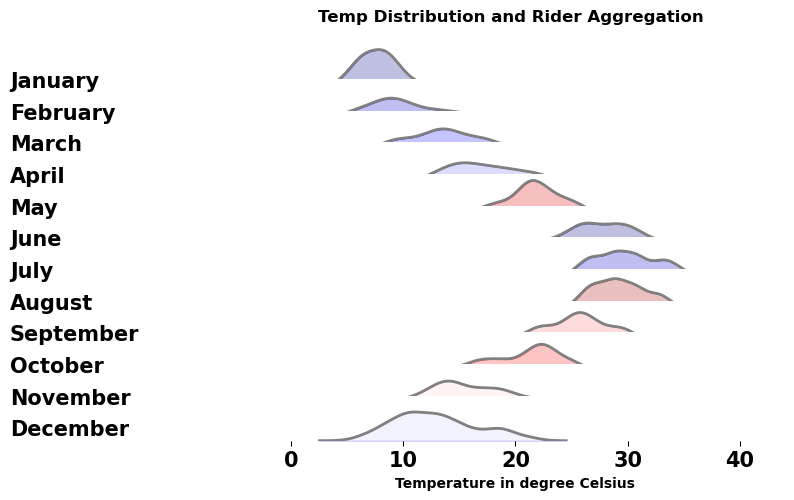

In [103]:
#color palette with Seaborn. color_palette ()

pal = sns.color_palette(palette='seismic',n_colors=10)

# in the sns.FacetGrid class, the 'hue' argument is the one that with the mean month

g = sns.FacetGrid(bike1, row='month', aspect=15, height=0.4,hue= 'mean_month', palette=pal)

# adding the densities kdeplots for each month

g.map(sns.kdeplot, 'temp',fill=True, lw=1)

# adding a Liner graph for the outline

g.map(sns.kdeplot,'temp', lw=2, color='grey')


#Use the facet grid axes (g.axes.flat) and add the month as text with the righ 
for i, ax in enumerate(g.axes.flat):
    ax.text(-25, 0.02, month_dic[i+1],fontweight='bold', fontsize=15)
    
    
#adjust the plots so they overlap 
g.fig.subplots_adjust(hspace=-0.3)

# Remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True) 
g.set_xlabels("") 
g.set_ylabels("")
plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold') 
plt.xlabel('Temperature in degree Celsius' , fontweight='bold', fontsize=10)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Temp Distribution and Rider Aggregation', fontweight='bold')

plt.show()

## create correlation plot

In [101]:
bike.corr()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month_num,day_num,total_riders,year
holiday,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.001731,-0.191832,-0.005393,0.012021
workingday,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.003394,-0.704267,0.011594,-0.002482
weather,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,0.012144,-0.047692,-0.128655,-0.012548
temp,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.257589,-0.038466,0.394454,0.061226
atemp,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.264173,-0.040235,0.389784,0.058540
humidity,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,0.204537,-0.026507,-0.317371,-0.078606
windspeed,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.150192,-0.024804,0.101369,-0.015221
casual,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.092722,0.246959,0.690414,0.145241
registered,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.169451,-0.084427,0.970948,0.264265
count,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.166862,-0.002283,1.000000,0.260403


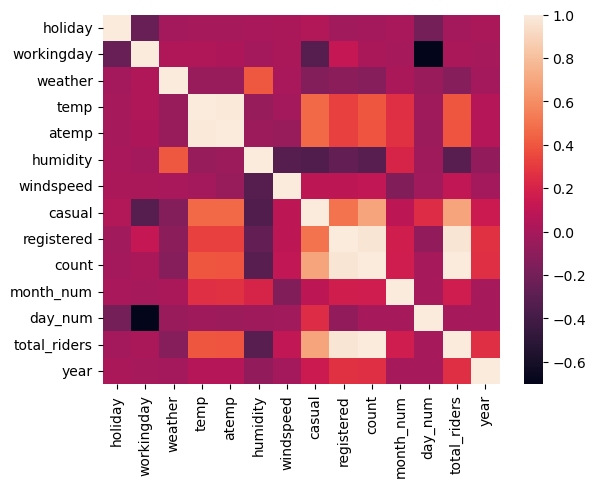

In [108]:
plt.show()
sns.heatmap(bike.corr());


## isolate the correlation to only the riders

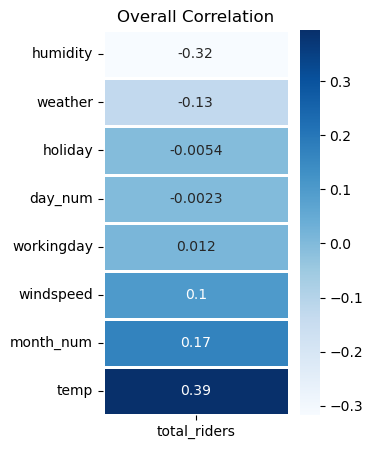

In [117]:
plt.figure(figsize=(3,5))

sns.heatmap(bike.corr()[['total_riders']].sort_values(by='total_riders')
                .drop(['total_riders','count','atemp',
                        'registered', 'casual', 'year']), 
            linewidths=1, annot=True, cmap='Blues');
plt.title('Overall Correlation')
plt.show()